In [1]:
library(glmnet)
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
options(stringsAsFactors = FALSE)

In [3]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

In [4]:
load(paste0(base_dir, "early.RData"))

In [5]:
length(bootstraps)

[1] 1000

In [6]:
lambda_sequence <- bootstraps[[1]][["lambda"]]
genes <- rownames(coef(bootstraps[[1]], s = lambda_sequence[1]))

In [7]:
head(genes)

[1] "(Intercept)"  "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"  
[6] "MALAT1_HUMAN"

In [8]:
head(lambda_sequence)

[1] 0.5630120 0.5350366 0.5084513 0.4831870 0.4591781 0.4363621

In [9]:
genes <- genes[2:length(genes)]

In [10]:
head(genes)
length(genes)
num_genes <- length(genes)

[1] "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"   "MALAT1_HUMAN"
[6] "PIGP_HUMAN"

[1] 22187

In [11]:
nonzero_gene_count <- c()
lambda <- min(lambda_sequence)

genes_coeff <- coef(bootstraps[[1]], s = lambda)
genes_coeff <- genes_coeff[2:length(genes_coeff),]
gene_names <- names(genes_coeff)
genes_nonzero <- gene_names[abs(genes_coeff) > 0]
nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))

genes_intersect <- genes_nonzero

for (i in 2:length(bootstraps)) {
    lambda_seq <- bootstraps[[i]][["lambda"]]
    if (lambda < tail(lambda_seq, n = 1)) {
        print(i)
    } 
    genes_coeff <- coef(bootstraps[[i]], s = lambda)
    genes_coeff <- genes_coeff[2:length(genes_coeff),]
    gene_names <- names(genes_coeff)
    genes_nonzero <- gene_names[abs(genes_coeff) > 0]
    nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))
    genes_intersect <- intersect(genes_intersect, genes_nonzero)
}

### Non-zero genes in all rounds

In [12]:
print(length(genes_intersect))
genes_intersect

[1] 61


[1] "TTN_HUMAN"       "NLGN1_HUMAN"     "FAM155A_HUMAN"   "CCDC141_HUMAN"  
 [5] "KCNIP4_HUMAN"    "SORCS1_HUMAN"    "HS3ST4_HUMAN"    "GRIN2A_HUMAN"   
 [9] "PTCHD4_HUMAN"    "UACA_HUMAN"      "PRTG_HUMAN"      "CNTN5_HUMAN"    
[13] "GPRIN3_HUMAN"    "PEG10_HUMAN"     "ANGPT1_HUMAN"    "CDH11_HUMAN"    
[17] "SYT1_HUMAN"      "FN1_HUMAN"       "TENM3_HUMAN"     "PLEKHA5_HUMAN"  
[21] "LDLRAD4_HUMAN"   "TENM4_HUMAN"     "RBMS3_HUMAN"     "LRP1B_HUMAN"    
[25] "PPFIA2_HUMAN"    "LAMA4_HUMAN"     "LSAMP_HUMAN"     "SPHKAP_HUMAN"   
[29] "MYH7_HUMAN"      "EGFEM1P_HUMAN"   "PIP5K1B_HUMAN"   "DLEU1_HUMAN"    
[33] "PDGFD_HUMAN"     "RNF150_HUMAN"    "HS6ST3_HUMAN"    "COL11A1_HUMAN"  
[37] "RELN_HUMAN"      "HMGA2_HUMAN"     "L3MBTL4_HUMAN"   "LDHA_HUMAN"     
[41] "UNC5C_HUMAN"     "NREP_HUMAN"      "CASC9_HUMAN"     "DTNA_HUMAN"     
[45] "ANKRD44_HUMAN"   "HSPG2_HUMAN"     "ETV1_HUMAN"      "NR2F2-AS1_HUMAN"
[49] "SYNPO2_HUMAN"    "PLCXD3_HUMAN"    "RPS6_HUMAN"      "SMARCA2_HUMAN"  
[53] "CKM_HUMAN"       "GRIA4_HUMAN"     "PRSS35_HUMAN"    "SLC44A5_HUMAN"  
[57] "NLGN4X_HUMAN"    "XDH_HUMAN"       "PRRX1_HUMAN"     "PDZD2_HUMAN"    
[61] "RNU4-2_HUMAN"

### Distribution of non-zero genes at min lambda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


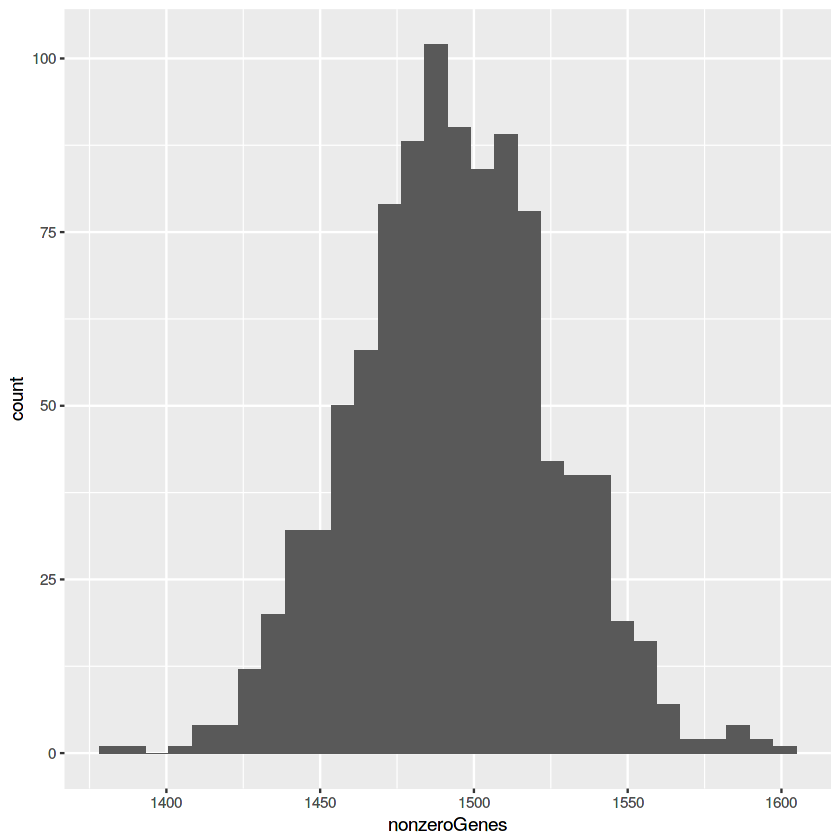

In [13]:
nonzero_gene_count <- as.data.frame(nonzero_gene_count)
colnames(nonzero_gene_count) <- "nonzeroGenes"
ggplot(nonzero_gene_count) + geom_histogram(aes(nonzeroGenes))

### Compare gene list to previous analysis (remove_1s2exp data)

In [14]:
remove_1st2exp_genes <- c('FAM155A_HUMAN','ARHGAP6_HUMAN','ADAMTS12_HUMAN','CCDC141_HUMAN','KCNIP4_HUMAN','SORCS1_HUMAN','ROBO2_HUMAN','GRIN2A_HUMAN','PDE3A_HUMAN','PTCHD4_HUMAN','UACA_HUMAN','CNTN5_HUMAN','GPRIN3_HUMAN','TECRL_HUMAN','PEG10_HUMAN','ANGPT1_HUMAN','CDH11_HUMAN','BMPER_HUMAN','SYT1_HUMAN','FN1_HUMAN','TENM3_HUMAN','GPC3_HUMAN','LDLRAD4_HUMAN','TENM4_HUMAN','RBMS3_HUMAN','AFF3_HUMAN','SPHKAP_HUMAN','MYH7_HUMAN','EGFEM1P_HUMAN','ANXA3_HUMAN','DLEU1_HUMAN','PDGFD_HUMAN','HS6ST3_HUMAN','PPP1R9A_HUMAN','COL11A1_HUMAN','RELN_HUMAN','HMGA2_HUMAN','FRMD5_HUMAN','BCAT1_HUMAN','LDHA_HUMAN','CASC9_HUMAN','MLIP_HUMAN','ANKRD44_HUMAN','NR2F2-AS1_HUMAN','PLCXD3_HUMAN','SMARCA2_HUMAN','PRSS35_HUMAN','PPP1R14C_HUMAN','DOK4_HUMAN','XDH_HUMAN','PRRX1_HUMAN','EEF1A1_HUMAN')
x <- intersect(remove_1st2exp_genes, genes_intersect)
x
length(x)

[1] "FAM155A_HUMAN"   "CCDC141_HUMAN"   "KCNIP4_HUMAN"    "SORCS1_HUMAN"   
 [5] "GRIN2A_HUMAN"    "PTCHD4_HUMAN"    "UACA_HUMAN"      "CNTN5_HUMAN"    
 [9] "GPRIN3_HUMAN"    "PEG10_HUMAN"     "ANGPT1_HUMAN"    "CDH11_HUMAN"    
[13] "SYT1_HUMAN"      "FN1_HUMAN"       "TENM3_HUMAN"     "LDLRAD4_HUMAN"  
[17] "TENM4_HUMAN"     "RBMS3_HUMAN"     "SPHKAP_HUMAN"    "MYH7_HUMAN"     
[21] "EGFEM1P_HUMAN"   "DLEU1_HUMAN"     "PDGFD_HUMAN"     "HS6ST3_HUMAN"   
[25] "COL11A1_HUMAN"   "RELN_HUMAN"      "HMGA2_HUMAN"     "LDHA_HUMAN"     
[29] "CASC9_HUMAN"     "ANKRD44_HUMAN"   "NR2F2-AS1_HUMAN" "PLCXD3_HUMAN"   
[33] "SMARCA2_HUMAN"   "PRSS35_HUMAN"    "XDH_HUMAN"       "PRRX1_HUMAN"

[1] 36

36 genes are detected in both analyses

### Caclulate fold changes for genes

In [15]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [17]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [19]:
cardioAICS <- t(cardioAICS)

early_cells <- cell_metadata$day %in% c("D12", "D14")
cardioAICS <- cardioAICS[early_cells,]

diff_day <- cell_metadata$day[early_cells]

names(diff_day) <- cell_metadata$X[early_cells]

cell_metadata <- cell_metadata[early_cells,]

In [21]:
genes.use <- genes_intersect

cytokine_cells <- cell_metadata$X[cell_metadata$protocol == "Murry"]
small_mol_cells <- cell_metadata$X[cell_metadata$protocol == "Lian"]

cytokine_exp_mat <- cardioAICS[cytokine_cells,]
small_mol_exp_mat <- cardioAICS[small_mol_cells,]

foldChange_list <- list()
for (i in 1:length(genes.use)) {
    gene <- genes.use[i]
    cytokine_exp <- cytokine_exp_mat[,gene]
    small_mol_exp <- small_mol_exp_mat[,gene]
    log2fc <- log2(mean(expm1(small_mol_exp)) + 1) - log2(mean(expm1(cytokine_exp)) + 1)
    foldChange_list[[gene]] <- log2fc
    
}

lfc_df <- data.frame("log2fc" = as.numeric(foldChange_list), "gene" = names(foldChange_list), row.names = names(foldChange_list))
lfc_df <- dplyr::arrange(lfc_df, log2fc)

In [22]:
lfc_df

log2fc,gene
-3.6607493,CNTN5_HUMAN
-1.5836942,SPHKAP_HUMAN
-1.0904951,GRIA4_HUMAN
-1.0326458,PDGFD_HUMAN
-1.0264053,EGFEM1P_HUMAN
-0.9273187,SORCS1_HUMAN
-0.9261419,L3MBTL4_HUMAN
-0.8601971,LRP1B_HUMAN
-0.8264670,PLCXD3_HUMAN
-0.7807262,SYNPO2_HUMAN


### Fit using 61 genes

In [23]:
diff_day <- as.factor(diff_day)

In [26]:
library(boot)

In [27]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [29]:
dim(subset_cardio)

[1] 9800   61

In [30]:
fit <- glm(diff_day ~ .,
    data = subset_cardio, family = binomial("logit")
   )

In [31]:
fit


Call:  glm(formula = diff_day ~ ., family = binomial("logit"), data = subset_cardio)

Coefficients:
      (Intercept)          TTN_HUMAN        NLGN1_HUMAN      FAM155A_HUMAN  
          -0.8076             0.2891            -0.2513             0.3264  
    CCDC141_HUMAN       KCNIP4_HUMAN       SORCS1_HUMAN       HS3ST4_HUMAN  
          -0.3070            -0.3485             0.3650             0.4141  
     GRIN2A_HUMAN       PTCHD4_HUMAN         UACA_HUMAN         PRTG_HUMAN  
          -0.5001            -0.4390             0.2161            -0.3682  
      CNTN5_HUMAN       GPRIN3_HUMAN        PEG10_HUMAN       ANGPT1_HUMAN  
           0.7278             0.2183             0.2543            -0.3091  
      CDH11_HUMAN         SYT1_HUMAN          FN1_HUMAN        TENM3_HUMAN  
           0.2444            -0.4933            -0.1843            -0.3898  
    PLEKHA5_HUMAN      LDLRAD4_HUMAN        TENM4_HUMAN        RBMS3_HUMAN  
          -0.2504             0.3168            -0.2

In [32]:
subset_cardio$diff_day <- diff_day

In [33]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

In [34]:
cv.test$delta

[1] 0.08989796 0.08887755

In [35]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [36]:
holdout_cardioAICS <- t(holdout_cardioAICS)
holdout_early_cells <- holdout_cell_metadata$day %in% c("D12", "D14")
holdout_cardioAICS <- holdout_cardioAICS[holdout_early_cells,]

diff_day <- holdout_cell_metadata$day[holdout_early_cells]

names(diff_day) <- holdout_cell_metadata$X[holdout_early_cells]

holdout_cell_metadata <- holdout_cell_metadata[holdout_early_cells,]

In [38]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [40]:
dim(holdout_mat)

[1] 1103   61

In [41]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [44]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("D12")
    } else {
        return("D14")
    }
}

In [45]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [47]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_day)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted D12 D14
      D12 496  51
      D14  54 502